<a href="https://colab.research.google.com/github/arturbernardo/eficacia_vacina_covid19/blob/main/eficiencia_vacinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -U "Mozilla" -O mortalidade_2021.csv https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/Mortalidade_Geral_2021.csv

In [ ]:
!pip install datetime

In [69]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [70]:
path = "/content/mortalidade_2021.csv"

In [130]:
mortalidade_2021 = pd.read_csv(path, engine="python", sep=";",
                 converters={
                     "DTNASC": converter_data,
                     "DTOBITO": converter_data
                     })

In [131]:
mortalidade_2021['IDADE'] = (mortalidade_2021['DTOBITO'] - mortalidade_2021['DTNASC']).astype('<m8[Y]')

In [ ]:
mortes_covid = mortalidade_2021[mortalidade_2021['CAUSABAS'].str.contains('B34')]
mortes_covid.shape

In [ ]:
mortes_c19_agg_data = mortes_covid.groupby('DTOBITO')
mortes_c19_agg_data.size()

In [ ]:
mortes_c19_agg_dia_idade = mortes_covid.groupby(['DTOBITO', 'IDADE']).size()
mortes_c19_agg_dia_idade

In [ ]:
mortalidade_dia = mortes_c19_agg_dia_idade.groupby(level=0).sum()
mortalidade_dia

In [ ]:
filtro_idade = mortes_covid[mortes_covid['IDADE'] >= 80]

maior_80 = filtro_idade.groupby('DTOBITO')['IDADE'].size()

print(maior_80)

In [137]:
data_to_plot = []
percentual_to_plot = []
window_size = 3

for index, todos, m80 in zip(mortalidade_dia.index, mortalidade_dia, maior_80):
    percentual = (m80 * 100) / todos
    # print(index, percentual, "m80", m80, "todos:", todos)
    data_to_plot.append(index)
    percentual_to_plot.append(percentual)

smothed_percentual_to_plot = np.convolve(percentual_to_plot, np.ones(window_size)/window_size, mode='full')[:len(percentual_to_plot)]



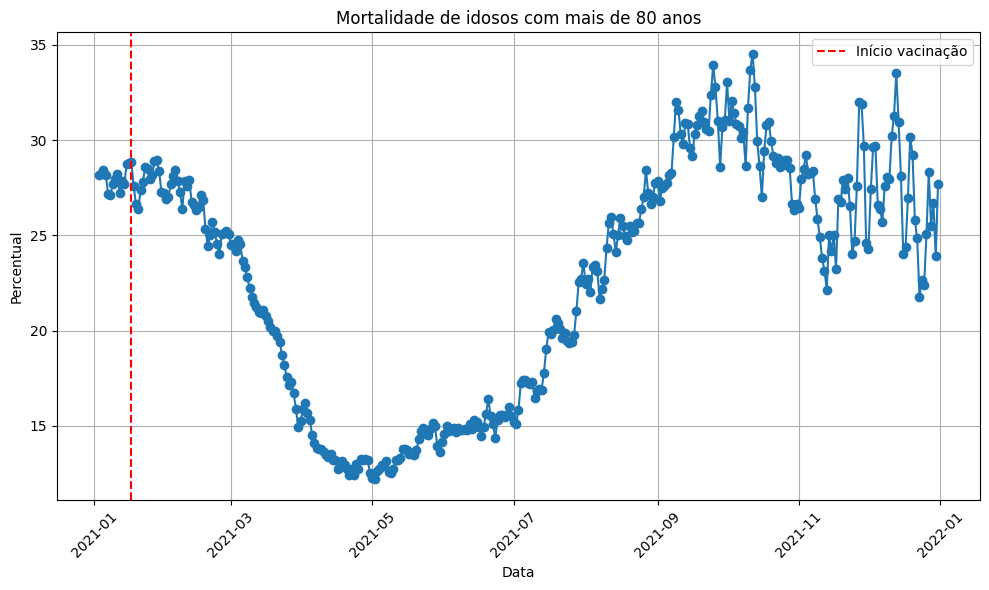

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(data_to_plot[2:], smothed_percentual_to_plot[2:], marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Percentual')
plt.title('Mortalidade de idosos com mais de 80 anos')

data_vertical = pd.Timestamp('2021-01-17')
plt.axvline(x=data_vertical, color='red', linestyle='--', label='Início vacinação')
plt.legend()

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
filtro_idade = mortes_covid[(mortes_covid['IDADE'] >= 70) & (mortes_covid['IDADE'] < 80)]

maior_70 = filtro_idade.groupby('DTOBITO')['IDADE'].size()

print(maior_70)

In [140]:
data_to_plot = []
percentual_to_plot = []
window_size = 3

for index, todos, m70 in zip(mortalidade_dia.index, mortalidade_dia, maior_70):
    percentual = (m70 * 100) / todos
    # print(index, percentual, "m70", m70, "todos:", todos)
    data_to_plot.append(index)
    percentual_to_plot.append(percentual)

smothed_percentual_to_plot = np.convolve(percentual_to_plot, np.ones(window_size)/window_size, mode='full')[:len(percentual_to_plot)]



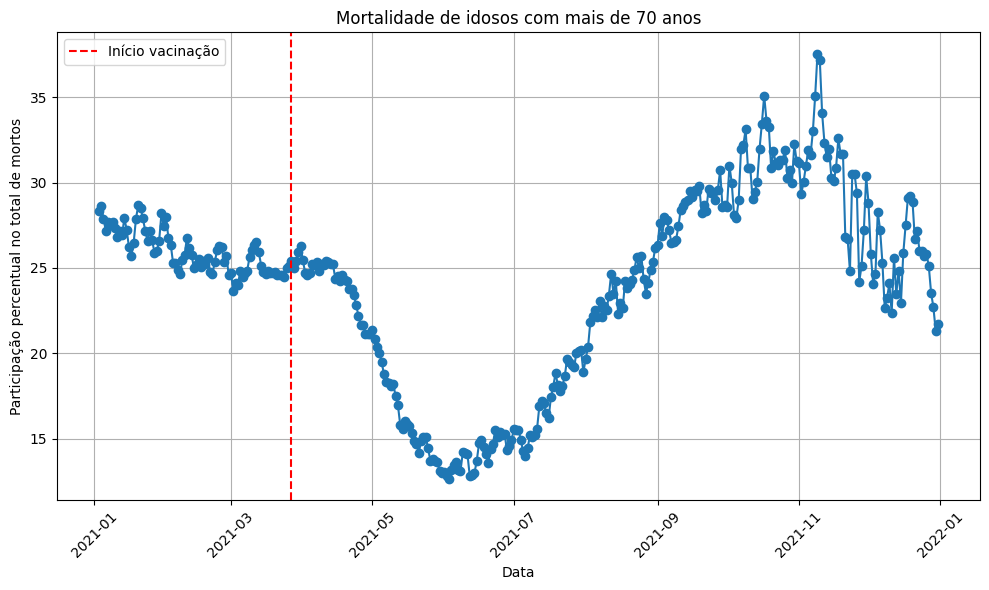

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(data_to_plot[2:], smothed_percentual_to_plot[2:], marker='o', linestyle='-')

plt.xlabel('Data')
plt.ylabel('Percentual')
plt.title('Mortalidade de idosos com mais de 70 anos')

data_vertical = pd.Timestamp('2021-03-27')
plt.axvline(x=data_vertical, color='red', linestyle='--', label='Início vacinação')
plt.legend()

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def converter_data(data):
    data_str = str(int(data)).zfill(8)

    dia = int(data_str[:2])
    mes = int(data_str[2:4])
    ano = int(data_str[4:])

    return pd.to_datetime(f"{ano}-{mes}-{dia}")

converter_data(18061962.0)